In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [102]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [103]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4    RH          242 non-null    float64
 5    Ws          242 non-null    float64
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 28.5+ KB


## Exploratory Data Analysis

In [105]:
# drop not required columns
df=df.drop(['day','month','year'],axis=1)

In [106]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [107]:
# Encoding of the categories in classes
#df_dummies=pd.get_dummies(df)    # (OR)
#df_dummies

In [108]:
# categories in classes
df['Classes  '].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes  , dtype: int64

In [109]:
#df['Classes  ']=np.where(df['Classes  ']=='not fire ',0,1)  # here 'not fire' gives 1 instead of 0 so below one work

In [110]:
#df.head()

In [111]:
df['Classes  ']=np.where(df['Classes  '].astype(str).str.contains('not fire'),0,1)

In [112]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [113]:
df['Classes  '].value_counts()

1    137
0    105
Name: Classes  , dtype: int64

In [115]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16292\1069690138.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


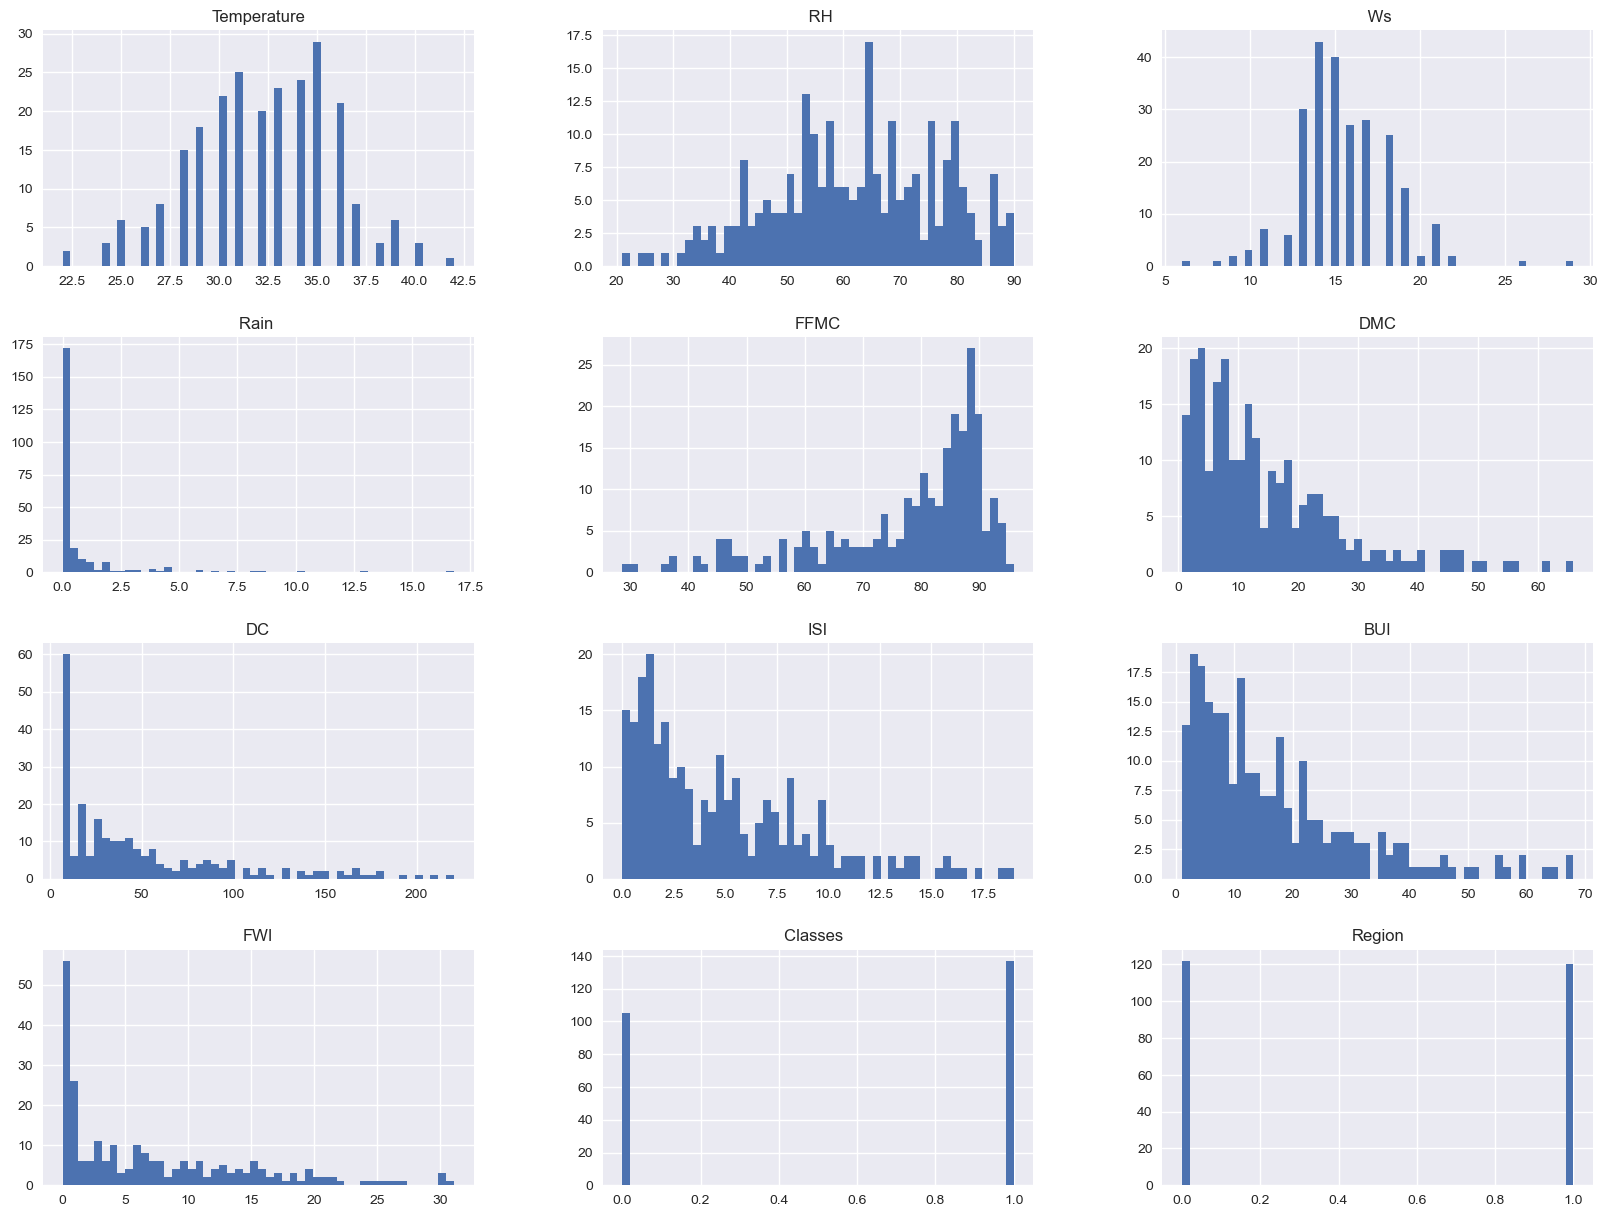

In [116]:
# plot density plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [120]:
# percentage for pie chart
percentage=df['Classes  '].value_counts(normalize=True)*100

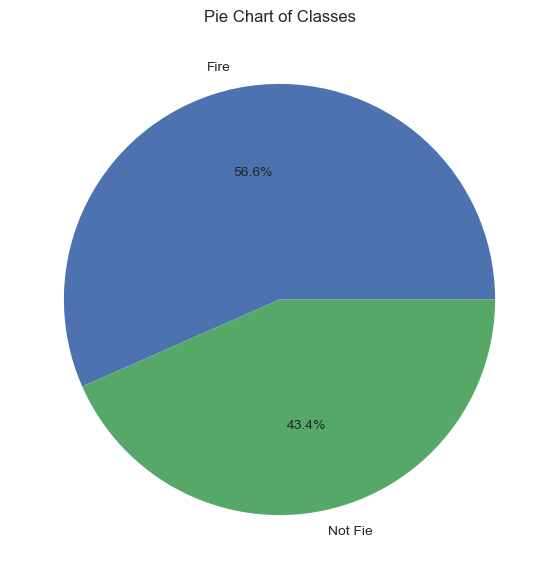

In [121]:
# ploting pie charts
classlabels=['Fire','Not Fie']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [122]:
# correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


<Axes: >

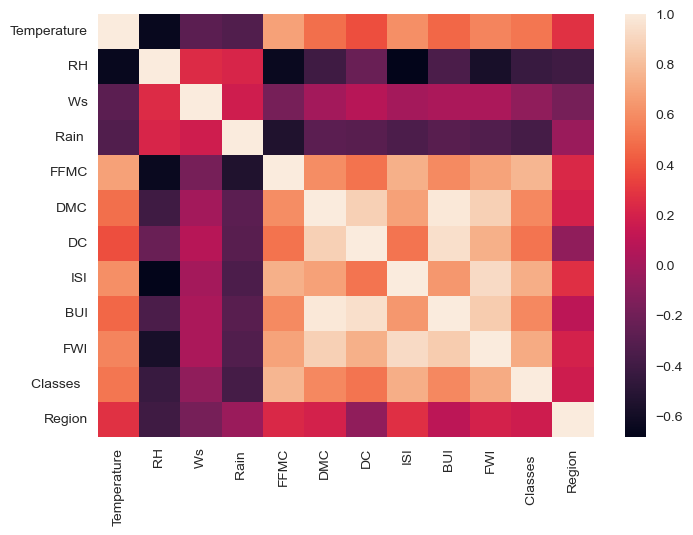

In [124]:
sns.heatmap(df.corr())

<Axes: >

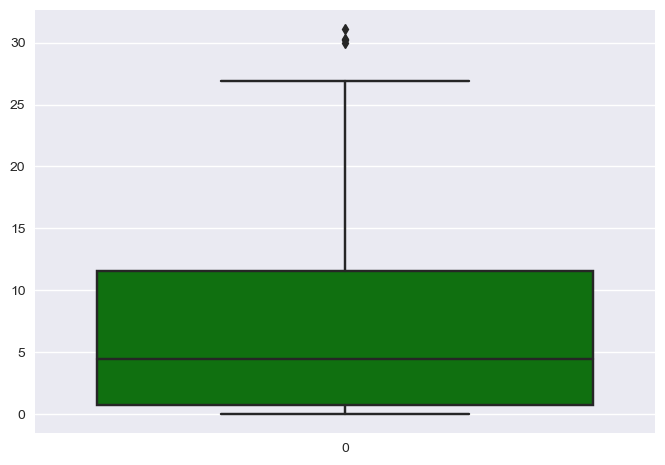

In [126]:
# box plot
sns.boxplot(df['FWI'],color='g')

In [128]:
df1=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [129]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


<Axes: xlabel='month', ylabel='count'>

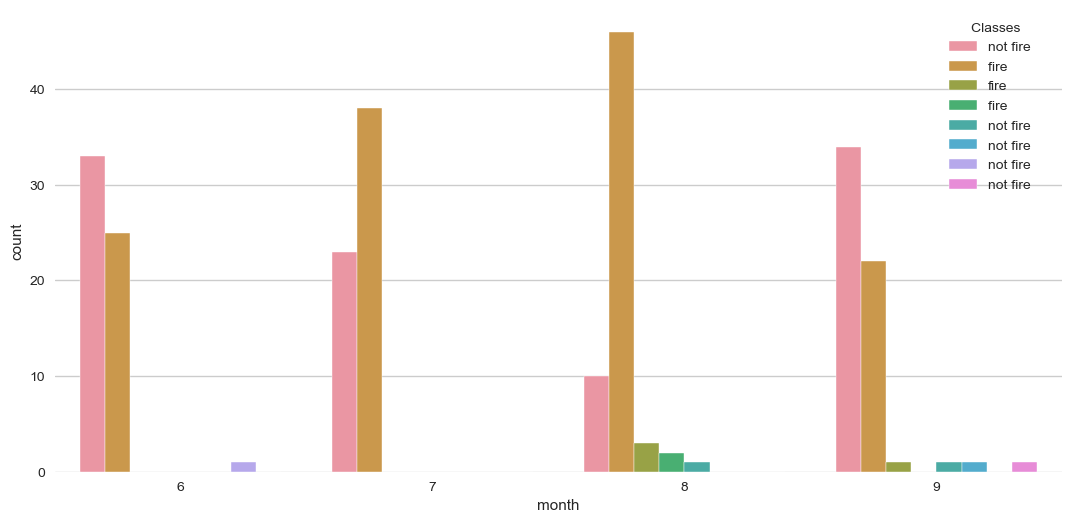

In [132]:
# monthly fire analysis
dftemp=[df1.loc[df['Region']==1]]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes  ',data=df1)

In [133]:
df1['Classes  ']=np.where(df1['Classes  '].astype(str).str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

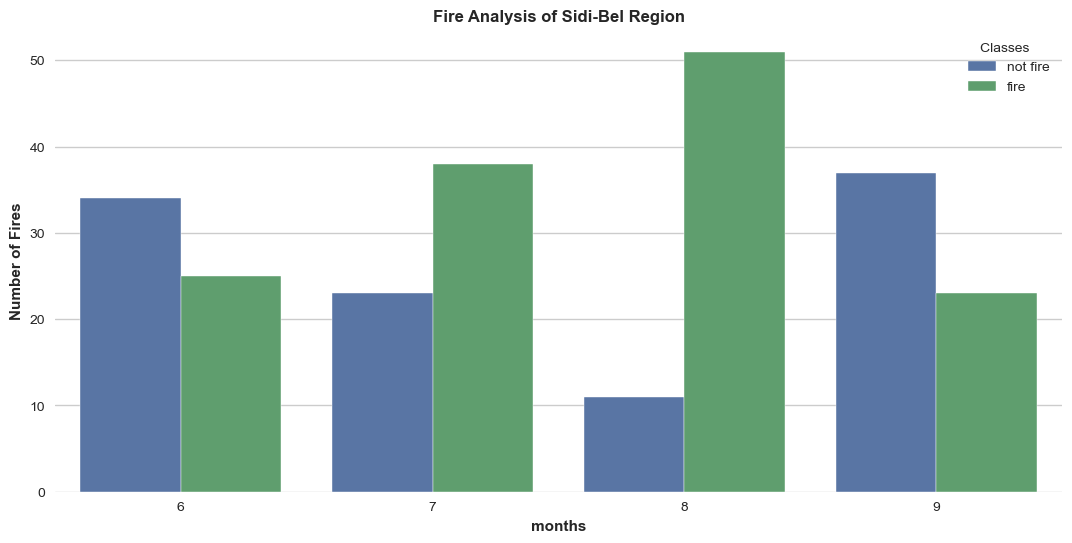

In [138]:
dftemp=[df1.loc[df['Region']==1]]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes  ',data=df1)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('months',weight='bold')
plt.title('Fire Analysis of Sidi-Bel Region',weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bajai Region')

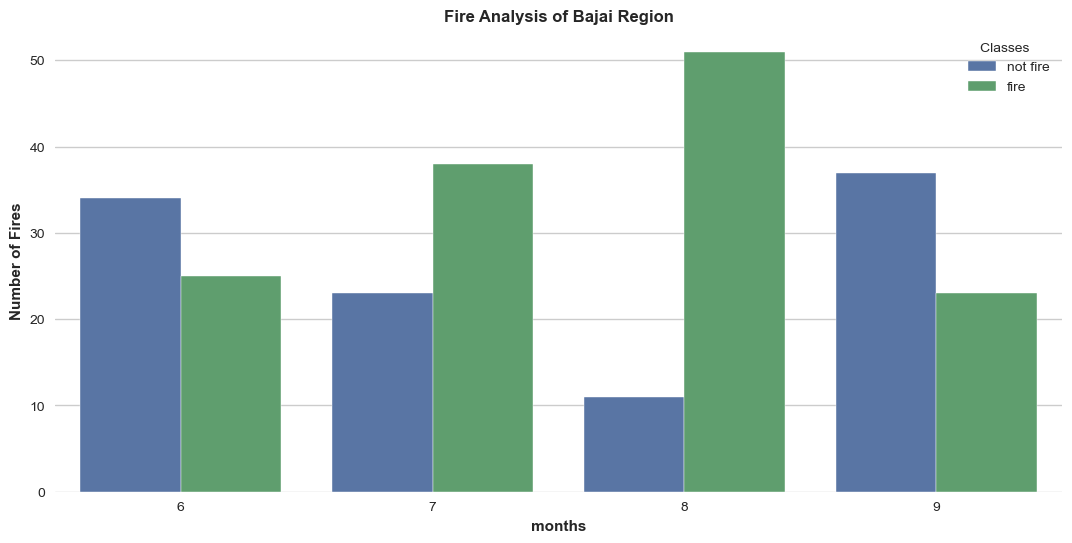

In [139]:
dftemp=[df1.loc[df['Region']==0]]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes  ',data=df1)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('months',weight='bold')
plt.title('Fire Analysis of Bajai Region',weight='bold')

#### Its observed that August and September had the most number of forest fires for both region.And 
#### from the above plot of months,we can understand few things




#### Most of the fires happend in August and very high Fires happend only in 3 months-June,July and August



#### Less fires was on September